In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import quandl
import pandas as pd
import statsmodels

plt.style.use('seaborn') 
quandl.ApiConfig.api_key = 'u-ZEDNt17YSrdcfkeU9m'


1. Extract stock data from internet and potentially build an API that is capable of extracting any stock with their stock code (I plan to use quandl API)

In [16]:
# Retrieve TSLA data from Quandl
medtronics = quandl.get('WIKI/MDT')

In [17]:
medtronics = medtronics[-300:]
medtronics.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-17,75.06,75.95,74.370,75.82,7084447.0,0.0,1.0,73.842186,74.717746,73.163380,74.589855,7084447.0
2017-01-18,76.27,76.27,75.210,75.67,5833131.0,0.0,1.0,75.032554,75.032554,73.989752,74.442289,5833131.0
2017-01-19,75.30,75.72,74.945,75.30,6753741.0,0.0,1.0,74.078292,74.491477,73.729051,74.078292,6753741.0
2017-01-20,75.51,75.68,74.720,74.99,8898612.0,0.0,1.0,74.284884,74.452126,73.507702,73.773321,8898612.0
2017-01-23,74.72,75.14,74.360,74.77,4523412.0,0.0,1.0,73.507702,73.920888,73.153543,73.556891,4523412.0


In [37]:
medtronics.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-17,75.06,75.95,74.370,75.82,7084447.0,0.0,1.0,73.842186,74.717746,73.163380,74.589855,7084447.0
2017-01-18,76.27,76.27,75.210,75.67,5833131.0,0.0,1.0,75.032554,75.032554,73.989752,74.442289,5833131.0
2017-01-19,75.30,75.72,74.945,75.30,6753741.0,0.0,1.0,74.078292,74.491477,73.729051,74.078292,6753741.0
2017-01-20,75.51,75.68,74.720,74.99,8898612.0,0.0,1.0,74.284884,74.452126,73.507702,73.773321,8898612.0
2017-01-23,74.72,75.14,74.360,74.77,4523412.0,0.0,1.0,73.507702,73.920888,73.153543,73.556891,4523412.0


2. Extract stock average data from quandl. There are two options. First, we could add three averages(nasdaq dow jones s&p 500 difference) into consideration, making it more general. Second, we can select the average based on the stock we selected from step one. But this way, I don’t know how to identify to which market does the stock belong. Maybe you can share your ideas.

In [59]:
nasdaq = quandl.get('NASDAQOMX/XQC')

In [60]:
nasdaq = nasdaq[-820:]["Index Value"]
nasdaq.head()

Trade Date
2017-01-13    5059.51
2017-01-17    5044.65
2017-01-18    5055.85
2017-01-19    5051.17
2017-01-20    5063.20
Name: Index Value, dtype: float64

In [63]:
medtronics.merge(nasdaq, how=("left"), left_index=True, right_index=True)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Index Value
Date,,,,,,,,,,,,,
2017-01-17,75.06,75.950,74.370,75.82,7084447.0,0.0,1.0,73.842186,74.717746,73.163380,74.589855,7084447.0,5044.65
2017-01-18,76.27,76.270,75.210,75.67,5833131.0,0.0,1.0,75.032554,75.032554,73.989752,74.442289,5833131.0,5055.85
2017-01-19,75.30,75.720,74.945,75.30,6753741.0,0.0,1.0,74.078292,74.491477,73.729051,74.078292,6753741.0,5051.17
2017-01-20,75.51,75.680,74.720,74.99,8898612.0,0.0,1.0,74.284884,74.452126,73.507702,73.773321,8898612.0,5063.20
2017-01-23,74.72,75.140,74.360,74.77,4523412.0,0.0,1.0,73.507702,73.920888,73.153543,73.556891,4523412.0,5065.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,79.90,80.770,79.760,80.04,4269204.0,0.0,1.0,79.900000,80.770000,79.760000,80.040000,4269204.0,6853.45
2018-03-22,79.16,79.810,77.995,78.14,4437081.0,0.0,1.0,79.160000,79.810000,77.995000,78.140000,4437081.0,6682.26
2018-03-23,78.21,78.600,76.410,76.55,5942063.0,0.0,1.0,78.210000,78.600000,76.410000,76.550000,5942063.0,6508.09


3. Run EDA. Since we are trying to understand the hidden pattern under the diabetes dataset, it is quite helpful for us to take a EDA on the dataset and have a good look of what might be going on in history. (Maybe more to be added)


In [65]:
medtronics.shape

(300, 12)

In [66]:
medtronics.isnull().values.any()

False

In [67]:
medtronics.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,81.929793,82.444504,81.364968,81.891700,4.915520e+06,0.004500,1.0,81.419302,81.930958,80.857174,81.380802,4.915520e+06
std,3.403399,3.388819,3.408404,3.369338,1.764967e+06,0.044872,0.0,3.448496,3.438532,3.433168,3.400147,1.764967e+06
min,73.990000,74.580000,73.590000,73.830000,1.922450e+06,0.000000,1.0,72.789546,73.369973,72.396036,72.632142,1.922450e+06
25%,79.790000,80.407500,79.320000,79.817500,3.712565e+06,0.000000,1.0,79.279519,79.792356,78.892248,79.347072,3.712565e+06
50%,81.600000,82.245000,81.095000,81.550000,4.517545e+06,0.000000,1.0,81.325000,81.857812,80.611408,81.284437,4.517545e+06
75%,84.102500,84.687500,83.677500,84.022500,5.690739e+06,0.000000,1.0,83.757004,84.127500,83.017011,83.471467,5.690739e+06
max,89.440000,89.720000,88.980000,89.300000,1.275381e+07,0.460000,1.0,88.455978,88.732897,88.001039,88.376858,1.275381e+07


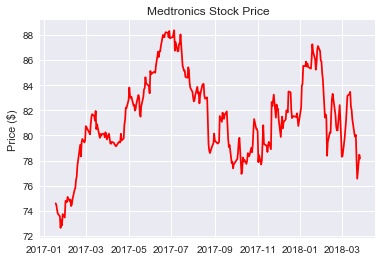

In [70]:
plt.plot(medtronics.index, medtronics['Adj. Close'], 'r')
plt.title('Medtronics Stock Price')
plt.ylabel('Price ($)');

4.  We could use PCA to select several linear independent and most contributing features to the stock price. 

In [ ]:
# codes

5. Then, we can do normal time series analysis like acf, pacf, ARIMA, Holt-Winters Method and etc to predict the price in future. Or we could use the machine learning models in https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba. Or some other less complex machine learning like regression and etc.

In [71]:
# codes